# Sistema de recomendación

Vamos a construir un sistema de recomendación de restaurantes con los datos de <b>Foursquare</b>

![](https://cdn-images-1.medium.com/max/800/1*i-Pq8aWDtFZ1GUhBJHDr-w.png)

       Foursquare es una web que ofrece servicios de entretenimiento basado en localización web aplicada a 
       las redes sociales. La geolocalización permite localizar un dispositivo fijo o móvil en una ubicación 
       geográfica

![](https://www.programmableweb.com/sites/default/files/foursquare-lg.jpg)

In [1]:
#Importamos Librerías
%matplotlib inline

import pandas as pd


# Cargar

### Datos sobre Foursquare checkins en NYC, descargados desde [la página de Dingqi Yang](https://sites.google.com/site/yangdingqi/home/foursquare-dataset)

Este conjunto de datos incluye datos de check-in, propinas y etiquetas de restaurantes en Nueva York recopilados en Foursquare del 24 de octubre de 2011 al 20 de febrero de 2012. Contiene 3112 usuarios y 3298 lugares con 27149 check-ins y 10377 tips (escrito en inglés)..

In [2]:
data = pd.read_table('../datasets/foursquare_checkins/dataset_ubicomp2013_checkins.txt', delim_whitespace = True, header = None, names=['user_id', 'venue_id'])
data

,user_id,venue_id
0,35443,899
1,24973,42406
2,14860,177
3,222505,177
4,63524,609
5,51957,435580
6,7860,68829
7,8952,12790
8,42283,15071
9,14506,25864


In [3]:
data.shape

(27149, 2)

In [4]:
#para saber cuantos usuarios únicos tenemos:
len(data['user_id'].unique()) #data.unique() → vistas unicas

2060

In [5]:
data['checkin'] = 1 #→ agrega columna con valor 1
data.head()

,user_id,venue_id,checkin
0,35443,899,1
1,24973,42406,1
2,14860,177,1
3,222505,177,1
4,63524,609,1


In [6]:
# Usamos set para contar los elementos únicos de un conjunto
my_list = [1, 1, 1, 2, 3]

In [7]:
set(my_list)#set() → usuarios unicos

{1, 2, 3}

Si un usuario visita varias veces el mismo lugar no hará ninguna diferencia en la métrica de distancia para 
jaccard, es por esto que quitaremos los duplicado en el conjunto de datos original

In [8]:
data.groupby(['user_id', 'venue_id']).count().sort_values('checkin',ascending = False) 
# data.groupby(['user_id', 'venue_id']).count() para saber si un usuario visito varias veces el mismo lugar 
# .sort_values('checkin',ascending:False) para organizar en forma descendente

,,checkin
user_id,venue_id,
51957,435580,149
51445,64971,92
17238,9209,86
8952,39242,74
133970,41096,73
39836,15743,72
38456,7999,69
59959,5222,63
17238,82634,55


In [9]:
data = data.drop_duplicates() # → remover duplicados

In [10]:
data.shape #→ dimensiones

(13472, 3)

# Transformar

In [11]:
data.head()

,user_id,venue_id,checkin
0,35443,899,1
1,24973,42406,1
2,14860,177,1
3,222505,177,1
4,63524,609,1


In [12]:
len(set(data['user_id'])) #usuarios únicos

2060

In [13]:
len(set(data['venue_id'])) #lugares únicos

2876

In [14]:
checkins_matrix = data.reset_index()\
    .pivot(index='venue_id', columns='user_id', values='checkin')\
    .fillna(0)\
    .astype(int)
    #si un usuario visitó un lugar se coloca un 1 sino un 0. 

In [15]:
checkins_matrix.head()

user_id,6,15,25,72,99,102,104,105,129,131,...,264033,264057,264722,264953,265643,265904,265965,266532,266576,266712
venue_id,,,,,,,,,,,,,,,,,,,,,
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
checkins_matrix.shape 
#Aquí validamos que la matrix es de 2876x2060. 

(2876, 2060)


# Visualizar

In [17]:
# Totalizamos las visitas por cada lugar(fila). Para saber cuantos check-ins ha tenido
checkins_matrix.sum(axis=1)

venue_id
15          1
20         20
25         29
26          2
36         10
39          2
40          4
42          8
46         16
47         14
52          2
59          2
77          6
78          4
83          4
86          6
88          2
98          3
99          2
102         1
105        10
114         8
115         9
123        12
133         3
138         6
141         2
142         7
148         5
154         2
           ..
1170409     1
1210157     2
1225401     1
1283376     6
1285202     1
1337942     1
1443163     2
1450342     5
1598475     2
1654176     4
1719875     1
1742184     1
1760748    16
1782104     5
1809245     2
1930899     1
1930905     1
1944209     1
1945122     1
1948043     4
1995366     4
2053266     1
2067414     2
2133943     1
2154515     5
2167106     1
2232344     1
2302016     1
2376156     1
2422200     1
Length: 2876, dtype: int64

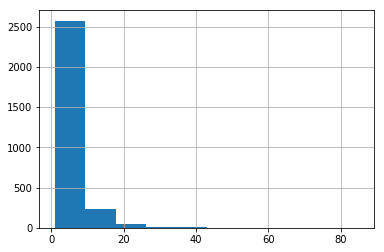

In [18]:
checkins_matrix.sum(1).hist() #Sumamos la eje 1 ( venue_id)
#la gran mayoria de lugares han sido visitado entre 0-10 veces

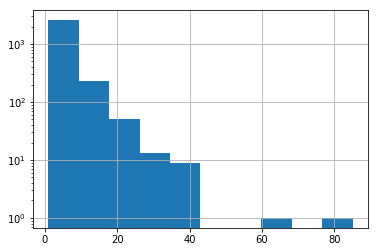

In [19]:
checkins_matrix.sum(1).hist(log=True) # Es otra opcion de visualizacion
# y nos dice que la diferencia entre los lugares que han sido visitado entre 0-10 y 10-20 se diferencian es 
# mas o menos una sola orden de magnitud. 

# Computar similaridades

Cada uno de los 2060 puntos tiene un lugar en el espacio vectorial. Si un punto queda cercano a otro es lo que
se conoce como similaridad en el Espacio Vectorial. Y lo podemos usar para un sistema de recomendación

### Primero vemos un ejemplo desmenuzado de la funcion que más adelante se va a definir.

In [20]:
# Tenemos dos lugares:
venue_1 = {1, 2, 4}

In [21]:
venue_2 = {3, 2, 4}

In [22]:
intersection = venue_1 & venue_2 #queremos saber que usuarios visitan ambos lugares
intersection   # esta es la interseccion de los conjuntos. Que usuarios van a ambos lugares:

{2, 4}

In [23]:
len(intersection) # esta es la medida

2

In [24]:
union = venue_1 | venue_2 # la union de ambos lugares. Conjunto de todos los usuarios
union

{1, 2, 3, 4}

In [25]:
len(union)

4

In [26]:
len(intersection) / len(union) # ya con esto sabemos la similitud de Jaccard entre dos lugares. 
    #Si es similar es 1, si no es similar es 0

0.5

### Ahora si, definimos la funcion de similaridad entre dos lugares:

In [27]:
def jaccard_similarity(venue_1, venue_2):
    venue_1_user_indices = set( venue_1[venue_1 > 0].index ) #Funciones para recuperar los Id unicos de los 
    venue_2_user_indices = set( venue_2[venue_2 > 0].index ) #usuarios que hayan visitado dos lugares
    intersection_length = len(venue_1_user_indices.intersection(venue_2_user_indices))  #Intersección
    union_length = len(venue_1_user_indices.union(venue_2_user_indices))  # Unión de Conjuntos
    
    return intersection_length / union_length

Función de similaridad dado un lugar en específico: 

In [28]:
def compute_pairwise_jaccard_similarities(query_venue_index):
    query_venue = checkins_matrix.loc[query_venue_index]
    candidate_venues = checkins_matrix.drop(query_venue_index, axis=0)
    similarities = {}
    
    for candidate_venue_id, candidate_venue in candidate_venues.iterrows():
        similarity = jaccard_similarity(query_venue, candidate_venue)
        similarities[candidate_venue_id] = similarity
        
    return pd.Series(similarities)

# Recomendar

Traemos la matrix sólo para saber los id de los lugares (venue_id)

In [29]:
checkins_matrix.head()

user_id,6,15,25,72,99,102,104,105,129,131,...,264033,264057,264722,264953,265643,265904,265965,266532,266576,266712
venue_id,,,,,,,,,,,,,,,,,,,,,
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ahora construimos un sistema de recomendación dado un lugar (venue_id), que nos organice una lista de 5 de los lugares mas similares al lugar en cuestion, entre más cercano a uno sea, mayor es la similitud entre ambos lugares.

In [ ]:
while True:
    try:
        query_venue_index = int( input('Por favor ingresa el venue_index de tu lugar favorito: ') )
        print( compute_pairwise_jaccard_similarities(query_venue_index).sort_values(ascending=False).head(5) )
    except:
        pass

Por favor ingresa el venue_index de tu lugar favorito: 26
2606      0.500000
12142     0.250000
96751     0.166667
32869     0.166667
407167    0.166667
dtype: float64
Por favor ingresa el venue_index de tu lugar favorito: 588262
590      1.000000
51593    0.500000
12368    0.333333
9463     0.333333
15261    0.250000
dtype: float64


Con esto hemos construido un sencillo sistema de recomendacion. <br></br>
Vale mencionar que éstas recomendacion son tan
buenas como se hayan definido los usuarios en el primer lugar.
En este caso fue por los lugares que visitaron, pero podría ser por la hora de visita, el tiempo que pasan en 
la web. Ya depende de nuestra creatividad para construir un sistema de recomendación